In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def get_avg(df):
    # calculates average confidence and average confidence for every sentiment
    positive_avg = df[df["sentiment"] == 2]["confidence"].mean()
    negative_avg = df[df["sentiment"] == 3]["confidence"].mean()
    neutral_avg = df[df["sentiment"] == 1]["confidence"].mean()
    avg_confidence = df["confidence"].mean()

    return {"Average Confidence: ": avg_confidence, "Positive Sentiment Avg: ": positive_avg, "Neutral Sentiment Avg: ": neutral_avg, "Negative Sentiment Avg: ": negative_avg} 

def get_lowest_frequency(df, n=200):
    # gets the least frequent words from each text
    frequency = {}
    texts = df["text"]
    for text in texts:
        # removes unnecessary characters
        words = re.sub(r'[^\w\s]', '', text.lower()).split()
        for word in words:
            if word in frequency:
                frequency[word] += 1
            else:
                frequency[word] = 1
                
    # sorts dictionary in ascending order
    sorted_freq = sorted(frequency.items(), key=lambda x: x[1])
    least_frequent_words = [word for word, count in sorted_freq[:n]]
    
    return least_frequent_words

def exclude_texts_with_least_frequent_words(df, least_frequent_words):
    # creates a filtered dataframe without texts that include the
    # least frequent tokens
    def contains_least_frequent_word(text):
        # what we apply to each row
        text_words = set(re.sub(r'[^\w\s]', '', text.lower()).split())
        return any(word in text_words for word in least_frequent_words)
        
    # returns least frequent words
    df_filtered = df[~df['text'].apply(contains_least_frequent_word)]
    return df_filtered

# every file
data_lst = ["asv_out.csv", "fbv_out.csv", "web_out.csv", "wmb_out.csv", "kjv_out.csv"]
# dictionary to store results from averages
results = {}
for data in data_lst:
    # average for normal df
    df = pd.read_csv(data)
    normal_avg = get_avg(df)
    # average for filtered df
    lowest_freq = get_lowest_frequency(df, 250)
    filtered_df = exclude_texts_with_least_frequent_words(df, lowest_freq)
    filtered_average = get_avg(filtered_df)
    # appends to dic
    results[data] = {"Normal: ": normal_avg, "Filtered: ": filtered_average}
    
data_for_df = []
# loop to create df to make a csv with results
for filename, data in results.items():
    entry = {
        "Filename": filename,
        "Normal Average Confidence": data["Normal: "]["Average Confidence: "],
        "Normal Positive Sentiment Avg": data["Normal: "]["Positive Sentiment Avg: "],
        "Normal Neutral Sentiment Avg": data["Normal: "]["Neutral Sentiment Avg: "],
        "Normal Negative Sentiment Avg": data["Normal: "]["Negative Sentiment Avg: "],
        "Filtered Average Confidence": data["Filtered: "]["Average Confidence: "],
        "Filtered Positive Sentiment Avg": data["Filtered: "]["Positive Sentiment Avg: "],
        "Filtered Neutral Sentiment Avg": data["Filtered: "]["Neutral Sentiment Avg: "],
        "Filtered Negative Sentiment Avg": data["Filtered: "]["Negative Sentiment Avg: "]
    }
    data_for_df.append(entry)

results_df = pd.DataFrame(data_for_df)
results_df.to_csv("least_frequent_results.csv", index=False)

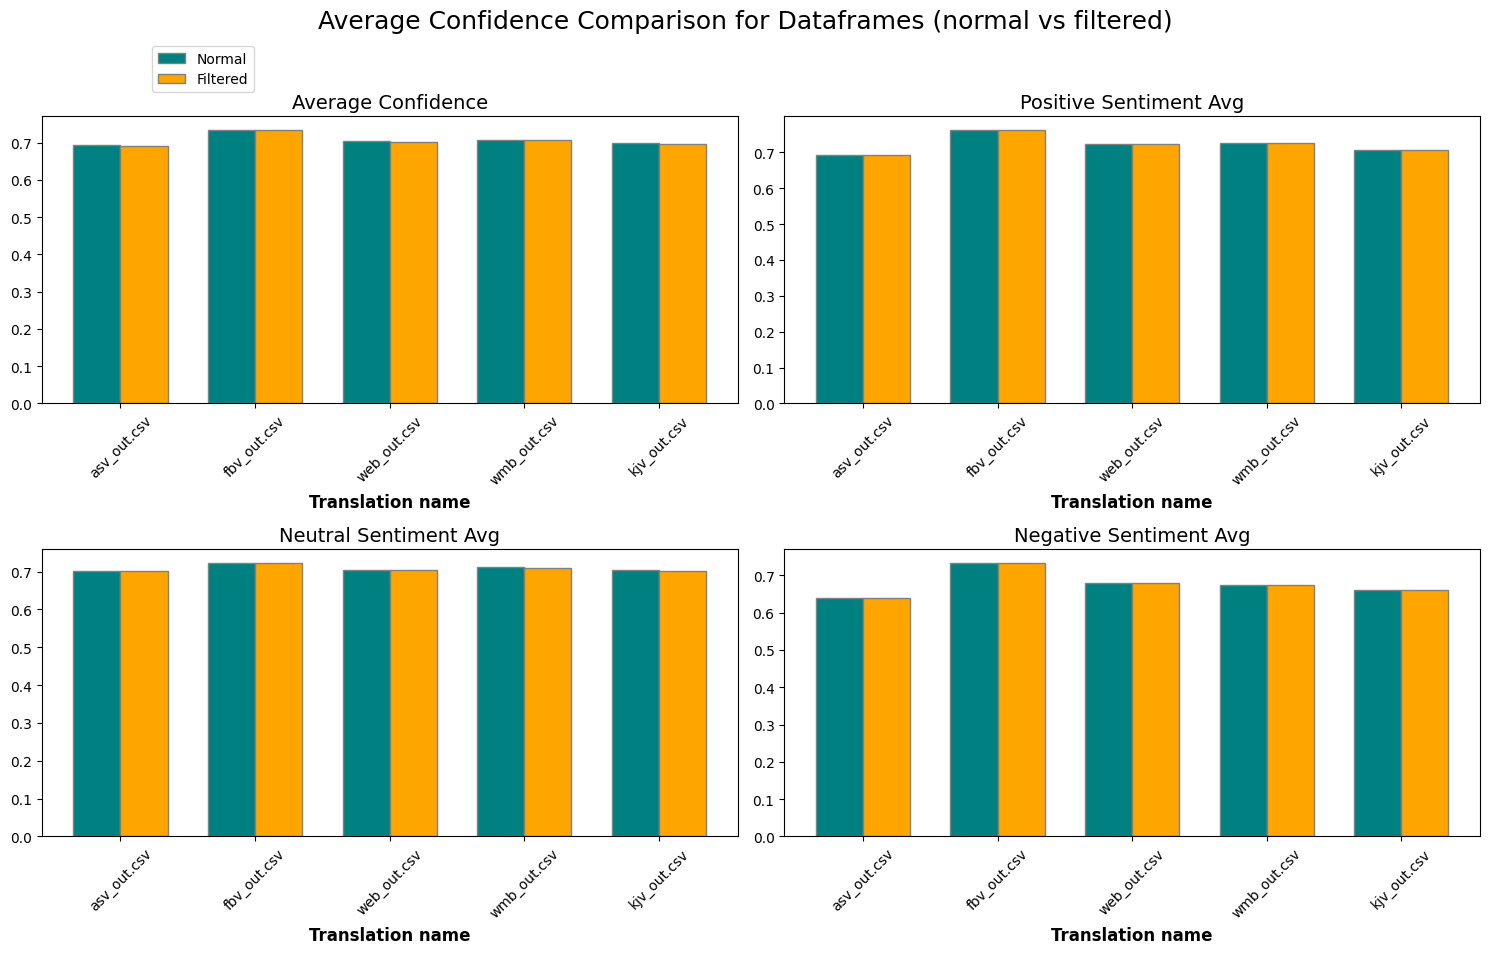

In [3]:
def visualize_sentiment_analysis(results):
    # labels for plot
    categories = ['Average Confidence', 'Positive Sentiment Avg', 'Neutral Sentiment Avg', 'Negative Sentiment Avg']
    labels = list(results.keys())
    
    n_categories = len(categories)

    # Creates a figure, 2 rows and 2 columns for the averages
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    fig.suptitle('Average Confidence Comparison for Dataframes (normal vs filtered)', fontsize=18)

    # Creates bar charts
    for i, category in enumerate(categories):
        # gets normal and filtered scores
        normal_scores = [results[label]['Normal: '][f'{category}: '] for label in labels]
        filtered_scores = [results[label]['Filtered: '][f'{category}: '] for label in labels]

        # For visuals
        bar_width = 0.35
        r1 = range(len(normal_scores))
        r2 = [x + bar_width for x in r1]

        # Makes plots
        axes[i].bar(r1, normal_scores, color='teal', width=bar_width, edgecolor='grey', label='Normal')
        axes[i].bar(r2, filtered_scores, color='orange', width=bar_width, edgecolor='grey', label='Filtered')

        # labels/ticks
        axes[i].set_xlabel('Translation name', fontweight='bold', fontsize=12)
        axes[i].set_xticks([r + bar_width / 2 for r in range(len(normal_scores))])
        axes[i].set_xticklabels(labels, rotation=45)
        axes[i].set_title(category, fontsize=14)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.95))

    # Show plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('results.png')
    plt.show()
    
visualize_sentiment_analysis(results)